#Neural Network Classification

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow Notes/datasets/apple_quality.csv')

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.drop("A_id", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [ ]:
df.drop(df.tail(1).index, inplace=True)

In [ ]:
df["Acidity"] = df["Acidity"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


In [ ]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


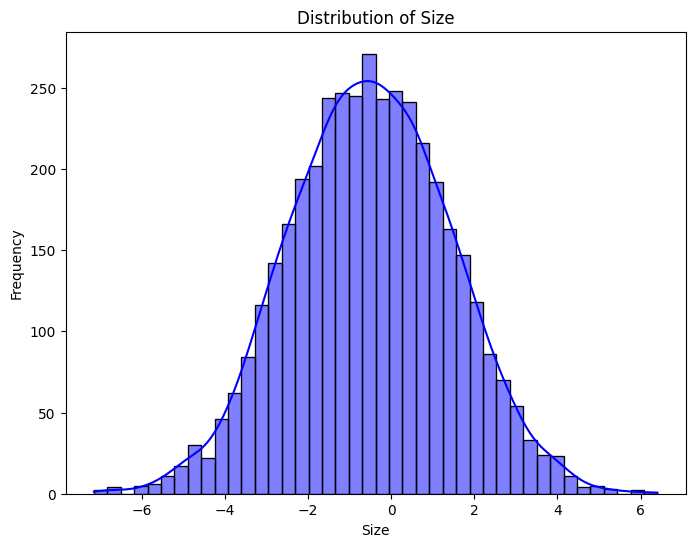

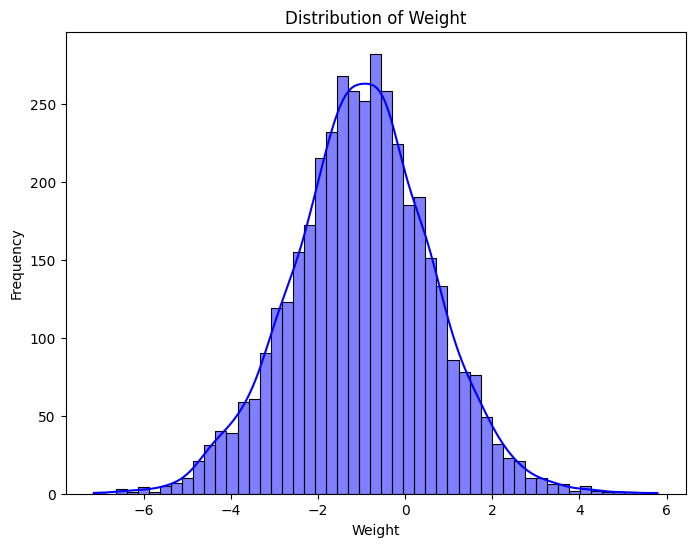

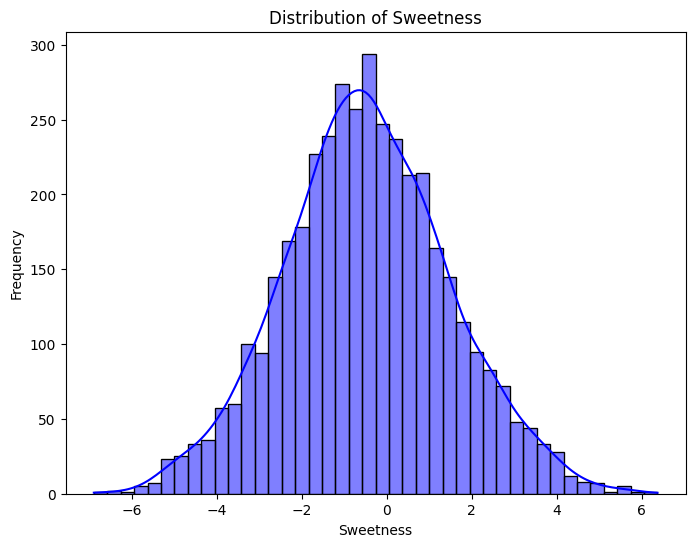

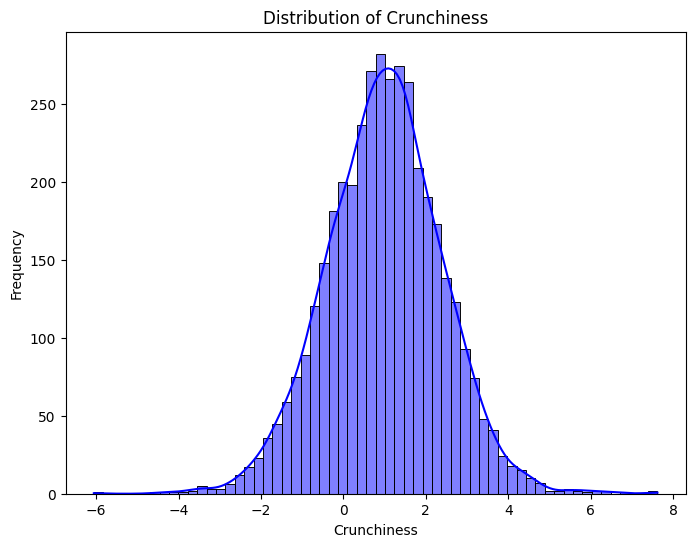

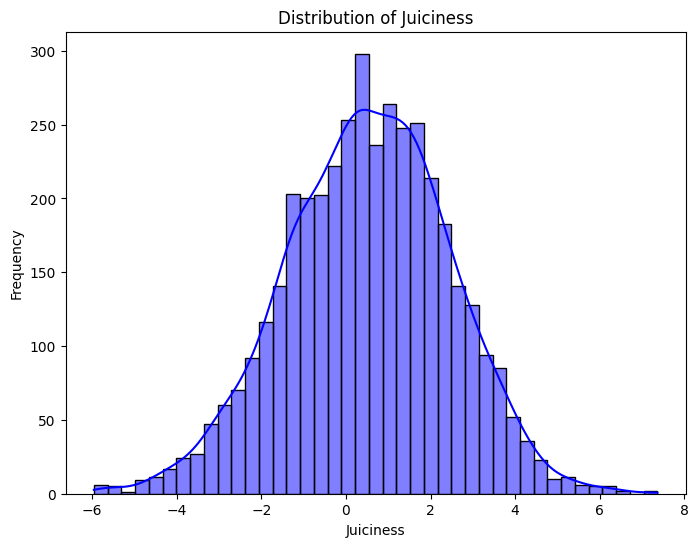

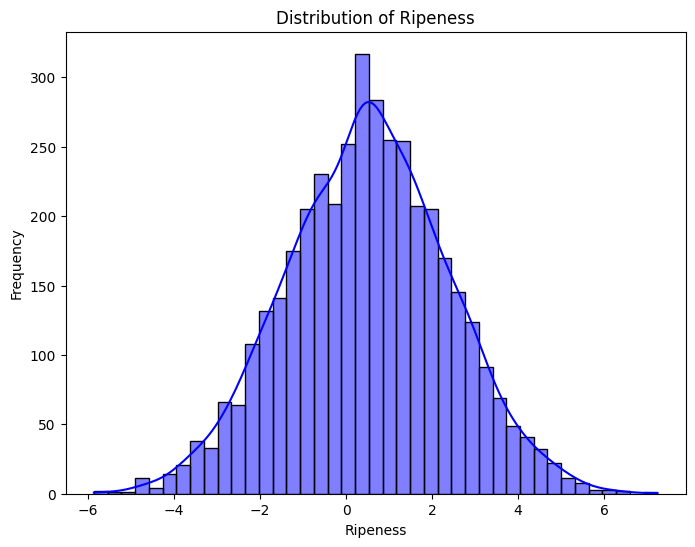

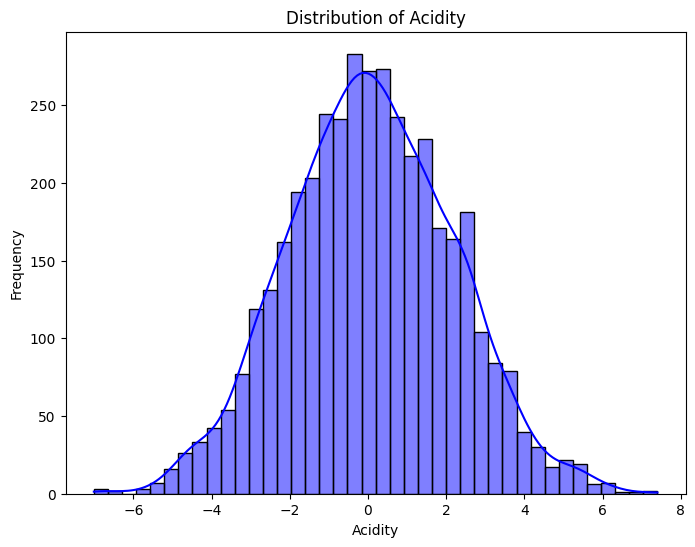

<ipython-input-41-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


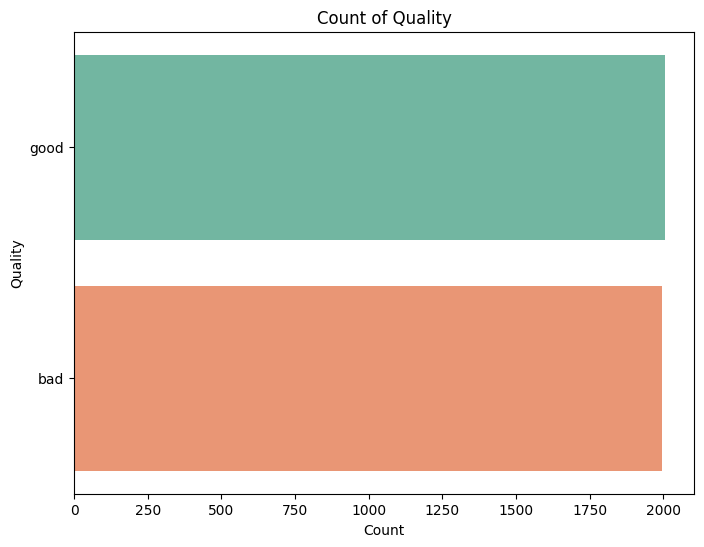

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

Types of Classification Tasks:
1. Binary Classification: "Only two categories per 1 output"
2. Multiclass Classification: "More than two categories per 1 output"
3. Multilabel Classification: "Multiple labels can be assigned to 1 instance"
4. Multioutput Classification: "Each instance have multiple outputs, but they are independent classification tasks"

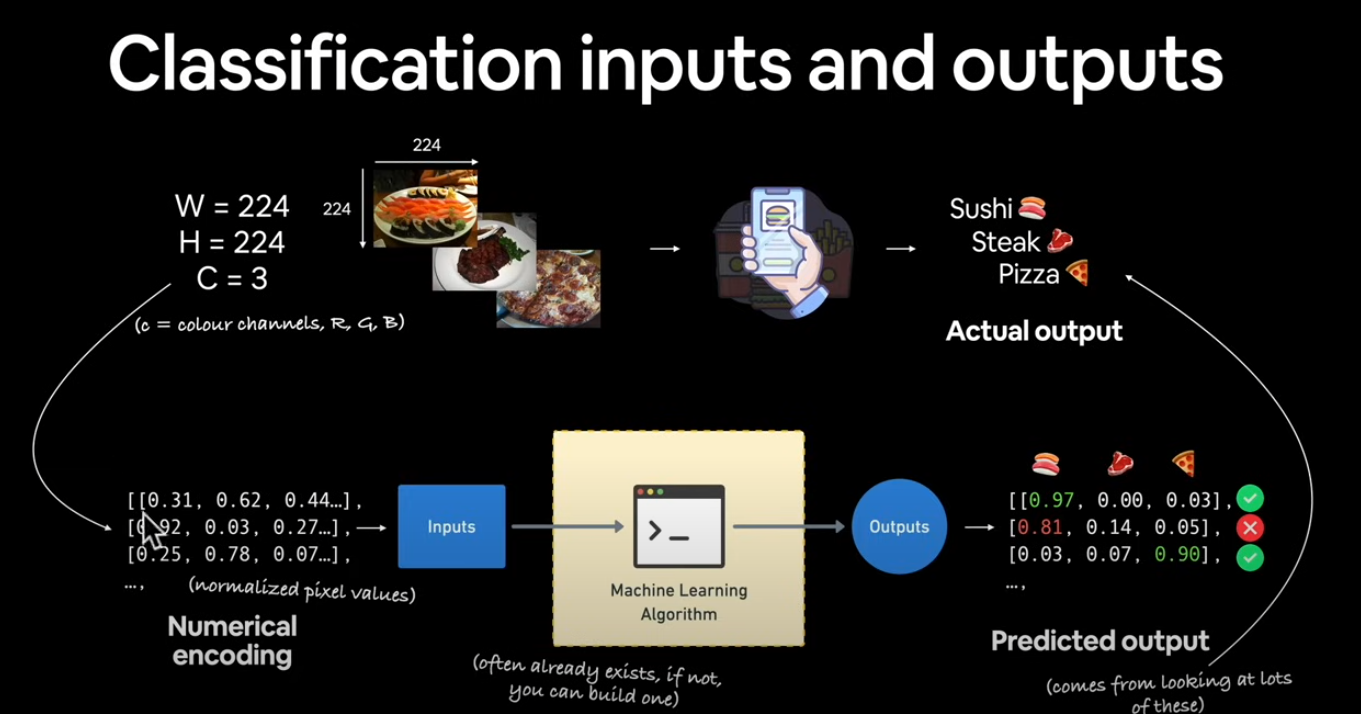

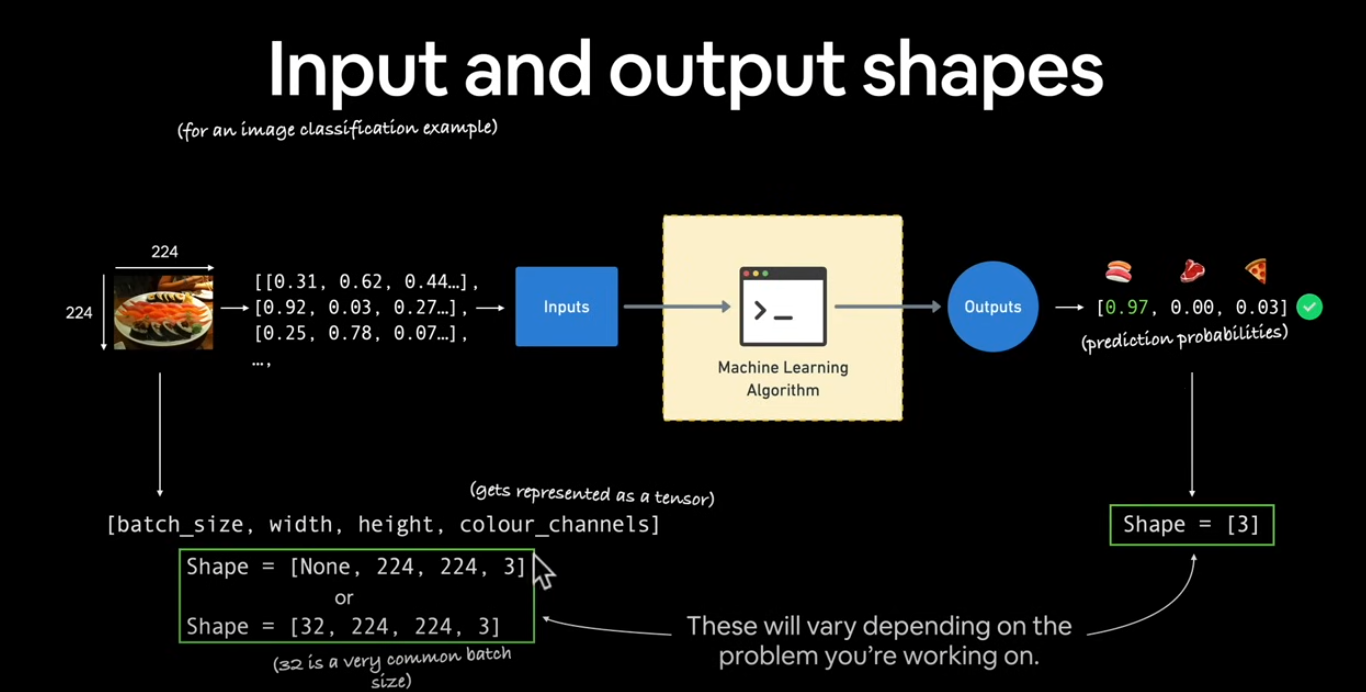

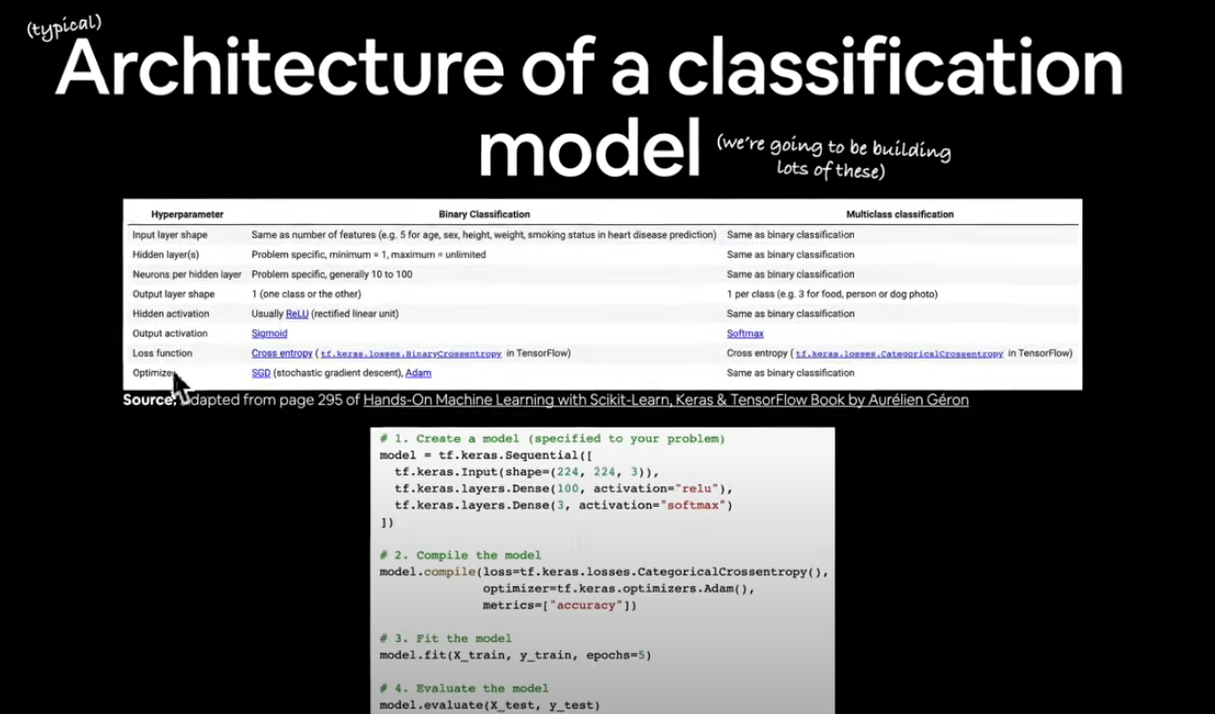

In [ ]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.shape

(4000, 8)

#Binary Classification

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

In [ ]:
filtered_columns = list(df.columns)
filtered_columns.remove("Quality")

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), filtered_columns),
    (OneHotEncoder(handle_unknown="ignore"), ['Quality']),
    remainder='passthrough'
)

In [ ]:
df_transformed = ct.fit_transform(df)

onehot_columns = list(ct.named_transformers_['onehotencoder'].get_feature_names_out(['Quality']))
column_names = filtered_columns + onehot_columns + list(df.columns[len(filtered_columns)+1:])

df_transformed_df = pd.DataFrame(df_transformed, columns=column_names)

print(df_transformed_df)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0.234669  0.358370   0.922484     0.368781   0.585819  0.472770   
1     0.439331  0.333107   0.795706     0.558928   0.511408  0.513807   
2     0.505948  0.448092   0.388567     0.417732   0.660388  0.444693   
3     0.479014  0.376971   0.619422     0.435629   0.720370  0.187052   
4     0.628107  0.452317   0.490589     0.402347   0.674814  0.348084   
...        ...       ...        ...          ...        ...       ...   
3995  0.531867  0.470029   0.239644     0.477379   0.574794  0.618866   
3996  0.505867  0.703146   0.504203     0.395971   0.449218  0.364566   
3997  0.333173  0.387278   0.335661     0.490846   0.612443  0.811182   
3998  0.231869  0.415014   0.697913     0.428137   0.609571  0.463966   
3999  0.548031  0.419946   0.528713     0.358392   0.542429  0.388327   

       Acidity  Quality_bad  Quality_good  
0     0.452225          0.0           1.0  
1     0.436185          0.0        

In [ ]:
df_transformed_df.drop("Quality_bad", axis=1, inplace=True)

In [ ]:
X = df_transformed_df.drop("Quality_good", axis=1)
y = df_transformed_df["Quality_good"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1494,0.652303,0.580015,0.461832,0.373638,0.539230,0.437161,0.660127
353,0.464952,0.461172,0.540031,0.485359,0.623260,0.407684,0.635133
1232,0.299871,0.399073,0.479841,0.514376,0.612843,0.546689,0.914483
613,0.484100,0.400330,0.379141,0.519068,0.343360,0.505532,0.273294
3506,0.243750,0.409756,0.630526,0.489741,0.514763,0.450318,0.246756
...,...,...,...,...,...,...,...
1130,0.616225,0.406687,0.327258,0.521782,0.709959,0.414970,0.689499
1294,0.402259,0.414047,0.419133,0.450567,0.491344,0.623276,0.288141
860,0.709229,0.423235,0.499215,0.438376,0.344791,0.790411,0.570286
3507,0.403523,0.461736,0.640869,0.513905,0.474259,0.485400,0.434178


In [ ]:
y_train

1494    1.0
353     0.0
1232    0.0
613     0.0
3506    0.0
       ... 
1130    1.0
1294    0.0
860     1.0
3507    1.0
3174    1.0
Name: Quality_good, Length: 2400, dtype: float64

In [ ]:
X_train.shape

(2400, 7)

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential(name="Model_1")
model.add(tf.keras.Input(shape=(7,)))  # The input layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation="softmax"))  # The output layer

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4975
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0000e+00 

In [ ]:
model.evaluate(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5088


[0.0, 0.5087500214576721]

In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5038


[0.0, 0.5037500262260437]

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1600      
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model2 = tf.keras.Sequential(name="Model_2")
model2.add(tf.keras.Input(shape=(7,)))  # The input layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(1, activation="softmax"))  # The output layer

# Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 2s 5ms/step - loss: 0.6751 - accuracy: 0.4975
Epoch 2/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.4975
Epoch 3/200
75/75 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.4975
Epoch 4/200
75/75 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.4975
Epoch 5/200
75/75 [==============================] - 0s 4ms/step - loss: 0.5493 - accuracy: 0.4975
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.4975
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.4975
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.4975
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.4975
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.4975
Epoch 11/

In [ ]:
model2.evaluate(X_val, y_val)

25/25 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.5088


[0.3046330511569977, 0.5087500214576721]

In [ ]:
model2.evaluate(X_test, y_test)

25/25 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.5038


[0.2888394594192505, 0.5037500262260437]

In [ ]:
df_transformed_df["Quality_good"].value_counts()

1.0    2004
0.0    1996
Name: Quality_good, dtype: int64

#Improve our model:
1. Create a model: Add more layers or more hidden units per layer
2. Compiling a model: Choose another optimization function, such as Adam or SGD
3. Fitting a model: Add more epochs

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model3 = tf.keras.Sequential(name="Model_3")
model3.add(tf.keras.Input(shape=(7,)))  # The input layer
model3.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(1, activation="softmax"))  # The output layer

# Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model3.fit(X_train, y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 1s 4ms/step - loss: 0.6128 - accuracy: 0.4975
Epoch 2/200
75/75 [==============================] - 0s 5ms/step - loss: 0.5264 - accuracy: 0.4975
Epoch 3/200
75/75 [==============================] - 0s 5ms/step - loss: 0.4865 - accuracy: 0.4975
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 0.4552 - accuracy: 0.4975
Epoch 5/200
75/75 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.4975
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.4975
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.4975
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.4975
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.4975
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.4975
Epoch 11/

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model4 = tf.keras.Sequential(name="Model_4")
model4.add(tf.keras.Input(shape=(7,)))  # The input layer
model4.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # The output layer

# Compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Assuming X_train and y_train are your input and target tensors
# Fit the model
model4.fit(X_train, y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 2s 6ms/step - loss: 0.6293 - accuracy: 0.6671
Epoch 2/200
75/75 [==============================] - 0s 6ms/step - loss: 0.5319 - accuracy: 0.7354
Epoch 3/200
75/75 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.7567
Epoch 4/200
75/75 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.7775
Epoch 5/200
75/75 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.7983
Epoch 6/200
75/75 [==============================] - 0s 4ms/step - loss: 0.3886 - accuracy: 0.8200
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8300
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8275
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8321
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8371
Epoch 11/

In [ ]:
model4.evaluate(X_val, y_val)

25/25 [==============================] - 1s 7ms/step - loss: 0.2126 - accuracy: 0.9312


[0.21260549128055573, 0.9312499761581421]

In [ ]:
model4.evaluate(X_test, y_test)

25/25 [==============================] - 1s 14ms/step - loss: 0.2249 - accuracy: 0.9200


[0.22489377856254578, 0.9200000166893005]